### Importing The Needed libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim

from torchsummary import summary

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import sys

### Verifying Version  

In [3]:
f'Torch Version  {torch.__version__}'
f'Numpy Version  {np.__version__}'
f'Python Version  {sys.version}'

'Torch Version  1.8.1'

'Numpy Version  1.19.4'

'Python Version  3.8.8 (default, Feb 24 2021, 21:46:12) \n[GCC 7.3.0]'

### Gpu check  

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
print('Model can run on :{}'.format(device))

Model can run on :cuda


### Creating Training dataset

In [6]:
X = torch.Tensor([[0,0], [0,1], [1,0], [1,1]])
Y = torch.Tensor([0, 1, 1, 0]).view(-1,1)

### sending the data to CUDA

In [7]:
X ,Y = X.to(device),Y.to(device)

###  Defining Model

In [8]:
class Net(nn.Module):
    def __init__(self,input_dim = 2,output_dim = 1):
        super(Net,self).__init__()
        
        self.layer1 = nn.Linear(in_features=input_dim,out_features=5)
        self.layer2 = nn.Linear(in_features=5,out_features=4)
        self.layer3 = nn.Linear(in_features=4,out_features=output_dim)
    
    def forward(self,x):
        x = self.layer1(x)
        x = F.tanh(x)
        x = self.layer2(x)
        x = F.tanh(x)
        x = self.layer3(x)
        return x
        
        

### Creating model Object and summary 

In [9]:
model = Net().to('cuda')

summary(model,(2,2))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 2, 5]              15
            Linear-2                 [-1, 2, 4]              24
            Linear-3                 [-1, 2, 1]               5
Total params: 44
Trainable params: 44
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


/home/jd/anaconda3/envs/eva5/lib/python3.8/site-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


### Generating the uniformly random distributed weights  

In [10]:
def weight_gen(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            m.weight.data.normal_(0,1)

In [11]:
weight_gen(model)

### Defining loss and optimizer 

In [12]:
loss_fun  = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr = 0.02,momentum=0.9)

### Running the model for 2001 epochs 

In [13]:
EPOCHS = 2001
steps = X.size(0)
loss_values = []
pbar = tqdm(range(EPOCHS))
for i in pbar:
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point], requires_grad=False)
        y_var = Variable(Y[data_point], requires_grad=False)
        
        optimizer.zero_grad()
        y_hat = model(x_var)
        loss = loss_fun.forward(y_hat, y_var)
        loss.backward()
        optimizer.step()
    pbar.set_description(desc= f'Epochs = {i} ,loss={loss.data.item()}')
    loss_values.append(loss.data.item())

Epochs = 2000 ,loss=0.15479612350463867: 100%|██████████| 2001/2001 [00:12<00:00, 160.51it/s]   


### ploting 

In [14]:
len(loss_values)

2001

Text(0.5, 1.0, 'Loss')

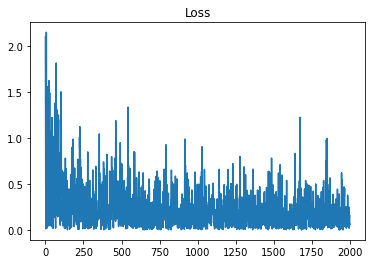

In [15]:
plt.plot(loss_values)
plt.title('Loss')